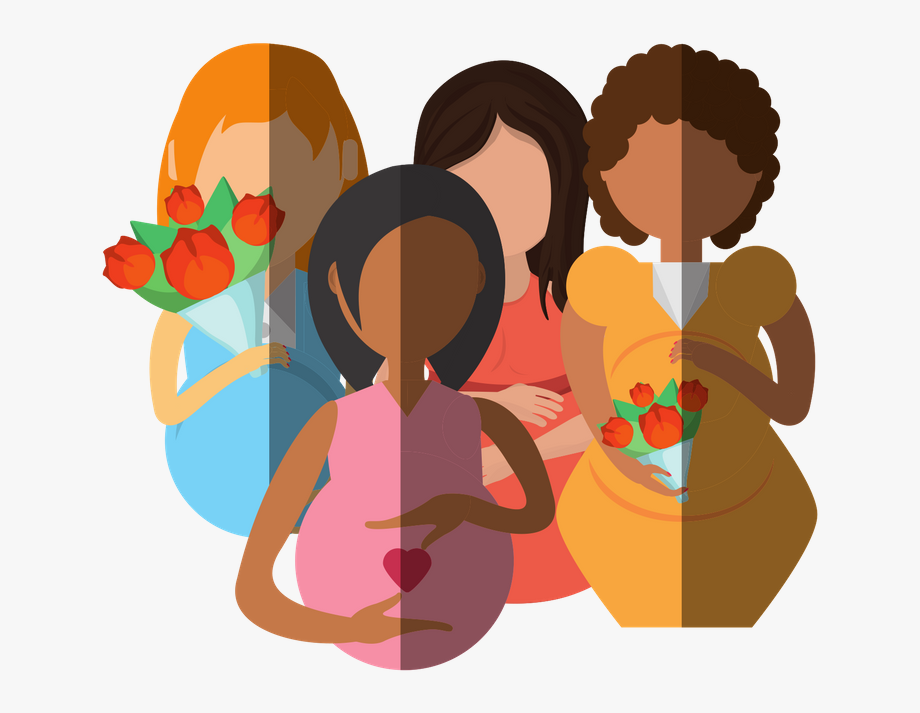

# Imarticus Capstone Project July - 2022
# Title:- Maternal Health Risk Detection
# Author:- Rohith Narayanan S 

## Contents
## I. Project  Abstract;
## II. Problem Statement;
## III. Dataset Information;
## IV.  Solving the Problem:
#### #1. Importing Necessary Libraries
#### #2. Importing the necessary Datasets
#### #3. Exploratory Data Analysis
#### #4. Data Balancing & Spliting
#### #5. Model Building
#### #6. Model Evaluatinon
#### #7. Saving theSelected Model
#### #8. Visualization of the Dataset
## V. Consclusion.

## I. Project Abstract :
Maternal mortality is a major, but often overlooked, public health problem and is unacceptably high now a days. About 2,95,000 women died during and following pregnancy and childbirth in 2017 alone. The vast majority of these deaths (94%) occurred in low-resource settings, and most could have been prevented with proper care.

Sub-Saharan Africa and Southern Asia accounted for approximately 86% (2,54,000) of the estimated global maternal deaths in 2017. Sub-Saharan Africa alone accounted for roughly two-thirds (1,96,000) of maternal deaths, while Southern Asia accounted for nearly one-fifth (58,000). 

At the same time, between 2000 and 2017, Southern Asia achieved the greatest overall reduction in MMR: a decline of nearly 60% (from an MMR of 384 down to 157). Despite its very high MMR in 2017, sub-Saharan Africa as a sub-region also achieved a substantial reduction in MMR of nearly 40% since 2000. Additionally, four other sub-regions roughly halved their MMRs during this period: Central Asia, Eastern Asia, Europe and Northern Africa. Overall, the maternal mortality ratio (MMR) in less-developed countries declined by just under 50%. 

## II. Problem Statement:
Since maternal risk and mortality is such a devastating problem, what can be done to decrease these numbers and to save both the maternal and the fetal health? We will be solving this question of how to predict maternal health outcomes based on CTG data and to prevent the loss of an unborn child.

## III. Dataset Information:
### The dataset consist of Cardiotocography (CTG) measures of baby's heart rate from several pregnant women
### Column Description:
* baseline value - Baseline Fetal Heart Rate (FHR) (beats per minute)  
* accelerations - Number of accelerations per second  
* fetal_movement - Number of fetal movements per second  
* uterine_contractions - Number of uterine contractions per second  
* light_decelerations - Number of light decelerations per second  
* severe_decelerations - Number of severe decelerations per second  
* prolongued_decelerations - Number of prolonged decelerations per second 
* abnormal_short_term_variability - Percentage of time with abnormal short-term variability  
* mean_value_of_short_term_variability - Mean value of short-term variability  
* percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long-term variability  
* mean_value_of_long_term_variability - Mean value of long-term variability 
* histogram_width - Width of FHR histogram (generated from exam)  
* histogram_min - Minimum of FHR histogram (generated from exam)  
* histogram_max - Maximum of FHR histogram (generated from exam)  
* histogram_number_of_peaks - Number of FHR histogram peaks (generated from exam)  
* histogram_number_of_zeroes - Number of FHR histogram zeroes (generated from exam)  
* histogram_mode - Mode of FHR histogram (generated from exam)  
* histogram_mean - Mean of FHR histogram (generated from exam)  
* histogram_median - Median of FHR histogram (generated from exam)  
* histogram_variance - Variance of FHR histogram (generated from exam)  
* histogram_tendency - Tendency of FHR histogram (generated from exam)  
* fetal_health - Fetal health as assessed by expert obstetrician. 1 - Normal, 2 - Suspect, 3 - Pathological 

## IV. Solving the Problem 

### 1. Importing Necessary Libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.multioutput import ClassifierChain
from sklearn.ensemble import BaggingClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.mixture import GaussianMixture
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.semi_supervised import LabelSpreading
from sklearn.linear_model import Perceptron
from imblearn.combine import SMOTEENN 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pickle
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
%matplotlib inline

### 2. Importing the necessary Datasets:

In [2]:
# Importing training data
df=pd.read_csv('fetal_health.csv')

In [3]:
# Checking dataset
df

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.000,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000,0.000,0.007,0.000,0.0,0.0,79.0,0.2,25.0,...,137.0,177.0,4.0,0.0,153.0,150.0,152.0,2.0,0.0,2.0
2122,140.0,0.001,0.000,0.007,0.000,0.0,0.0,78.0,0.4,22.0,...,103.0,169.0,6.0,0.0,152.0,148.0,151.0,3.0,1.0,2.0
2123,140.0,0.001,0.000,0.007,0.000,0.0,0.0,79.0,0.4,20.0,...,103.0,170.0,5.0,0.0,153.0,148.0,152.0,4.0,1.0,2.0
2124,140.0,0.001,0.000,0.006,0.000,0.0,0.0,78.0,0.4,27.0,...,103.0,169.0,6.0,0.0,152.0,147.0,151.0,4.0,1.0,2.0


In [4]:
# Checking the Shape of Data
df.shape 

(2126, 22)

In [5]:
# Creating a new dataset of target Variable alone
df_tar = pd.DataFrame()
df_tar['fetal_health'] = df['fetal_health']
df_tar.sample()

,fetal_health
1262,1.0


In [6]:
# Checking for null values in the target variable
for i in df_tar.columns:
    print(i,'=',df_tar[i].isnull().sum(),df_tar[i].dtype)

fetal_health = 0 float64


### There are no missing in the target variable

### 3. Exploratory Data Analysis:

In [7]:
# Checking whether the index is unique and in order
df.index.is_unique

True

In [8]:
# Checking for false indexes
df.index.duplicated()

array([False, False, False, ..., False, False, False])

In [9]:
# Viewing the sample of the dataframe
df.sample(10)

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
1198,133.0,0.000,0.000,0.006,0.000,0.0,0.000,53.0,0.7,2.0,...,113.0,147.0,4.0,1.0,136.0,136.0,138.0,1.0,1.0,1.0
1584,132.0,0.000,0.000,0.006,0.000,0.0,0.000,35.0,1.3,0.0,...,79.0,150.0,4.0,0.0,133.0,135.0,137.0,9.0,1.0,1.0
706,133.0,0.000,0.000,0.007,0.000,0.0,0.000,64.0,0.4,81.0,...,126.0,138.0,1.0,0.0,133.0,132.0,134.0,0.0,0.0,3.0
911,146.0,0.003,0.000,0.002,0.005,0.0,0.000,25.0,2.5,0.0,...,80.0,172.0,8.0,1.0,155.0,145.0,152.0,32.0,1.0,1.0
319,150.0,0.000,0.024,0.000,0.000,0.0,0.000,79.0,0.2,84.0,...,147.0,152.0,1.0,0.0,150.0,149.0,151.0,0.0,0.0,3.0
1168,126.0,0.000,0.000,0.003,0.000,0.0,0.000,36.0,0.9,4.0,...,121.0,142.0,1.0,0.0,136.0,133.0,135.0,1.0,1.0,1.0
18,130.0,0.003,0.451,0.006,0.004,0.0,0.001,23.0,1.9,0.0,...,59.0,158.0,6.0,0.0,133.0,124.0,129.0,36.0,1.0,1.0
899,144.0,0.004,0.000,0.006,0.000,0.0,0.000,32.0,1.2,0.0,...,117.0,175.0,4.0,0.0,148.0,150.0,150.0,8.0,0.0,1.0
392,143.0,0.000,0.000,0.000,0.000,0.0,0.000,70.0,0.3,49.0,...,137.0,150.0,1.0,0.0,146.0,144.0,146.0,0.0,0.0,2.0
16,130.0,0.006,0.441,0.005,0.005,0.0,0.000,24.0,2.1,0.0,...,53.0,178.0,5.0,0.0,143.0,128.0,138.0,70.0,1.0,1.0


In [10]:
# Dedcribing the properties of the features of the dataset
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [11]:
# Getting the shape of the dataset
df.shape 

(2126, 22)

In [12]:
# Checking for data correlation 
df.corr()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
baseline value,1.000000,-0.080560,-0.033436,-0.146373,-0.159032,-0.053518,-0.104597,0.305570,-0.279607,0.285630,...,0.361619,0.275110,-0.113933,-0.004745,0.708993,0.723121,0.789246,-0.133938,0.293503,0.148151
accelerations,-0.080560,1.000000,0.048235,0.089674,-0.108615,-0.043018,-0.127749,-0.279577,0.207170,-0.373943,...,-0.154286,0.394147,0.190452,-0.006147,0.243610,0.270334,0.272849,0.125704,0.028420,-0.364066
fetal_movement,-0.033436,0.048235,1.000000,-0.068779,0.049228,-0.010976,0.265922,-0.103715,0.121314,-0.074096,...,-0.153917,0.099853,0.164654,-0.017749,-0.061192,-0.089671,-0.072329,0.179340,-0.001541,0.088010
uterine_contractions,-0.146373,0.089674,-0.068779,1.000000,0.285079,0.006788,0.077036,-0.232811,0.289679,-0.306608,...,-0.113323,0.122766,0.082693,0.057894,-0.104854,-0.187505,-0.140287,0.238582,-0.072314,-0.204894
light_decelerations,-0.159032,-0.108615,0.049228,0.285079,1.000000,0.107573,0.225611,-0.119152,0.562170,-0.271282,...,-0.553534,0.218043,0.397620,0.235296,-0.347233,-0.527354,-0.388586,0.564289,0.000072,0.058870
severe_decelerations,-0.053518,-0.043018,-0.010976,0.006788,0.107573,1.000000,0.012395,0.033949,0.034130,-0.030770,...,-0.071974,-0.021135,0.007024,0.043441,-0.215161,-0.158673,-0.160451,0.136421,-0.070483,0.131934
prolongued_decelerations,-0.104597,-0.127749,0.265922,0.077036,0.225611,0.012395,1.000000,0.046226,0.267011,-0.137333,...,-0.276764,0.120221,0.222860,0.056423,-0.436416,-0.488663,-0.444778,0.503301,-0.215405,0.484859
abnormal_short_term_variability,0.305570,-0.279577,-0.103715,-0.232811,-0.119152,0.033949,0.046226,1.000000,-0.430705,0.459413,...,0.275378,-0.111806,-0.167561,-0.149296,0.058363,0.074554,0.119960,-0.146434,-0.005748,0.471191
mean_value_of_short_term_variability,-0.279607,0.207170,0.121314,0.289679,0.562170,0.034130,0.267011,-0.430705,1.000000,-0.470259,...,-0.622569,0.409072,0.501430,0.266183,-0.307586,-0.445401,-0.336109,0.555852,-0.066140,-0.103382
percentage_of_time_with_abnormal_long_term_variability,0.285630,-0.373943,-0.074096,-0.306608,-0.271282,-0.030770,-0.137333,0.459413,-0.470259,1.000000,...,0.422834,-0.283183,-0.279301,-0.121784,0.165211,0.222321,0.186480,-0.281536,0.042481,0.426146


In [13]:
# Getting detail on the feature of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

<AxesSubplot:>

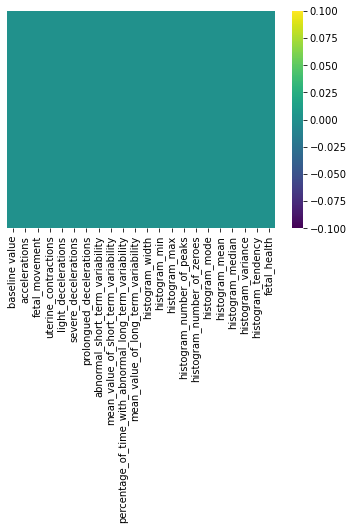

In [14]:
# Checking visually for missing values
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")

In [15]:
# Checking for missing values
for i in df.columns:
    print(i,'=',df[i].isnull().sum(),df[i].dtype)

baseline value = 0 float64
accelerations = 0 float64
fetal_movement = 0 float64
uterine_contractions = 0 float64
light_decelerations = 0 float64
severe_decelerations = 0 float64
prolongued_decelerations = 0 float64
abnormal_short_term_variability = 0 float64
mean_value_of_short_term_variability = 0 float64
percentage_of_time_with_abnormal_long_term_variability = 0 float64
mean_value_of_long_term_variability = 0 float64
histogram_width = 0 float64
histogram_min = 0 float64
histogram_max = 0 float64
histogram_number_of_peaks = 0 float64
histogram_number_of_zeroes = 0 float64
histogram_mode = 0 float64
histogram_mean = 0 float64
histogram_median = 0 float64
histogram_variance = 0 float64
histogram_tendency = 0 float64
fetal_health = 0 float64


### There are no Missing values in the Dataframe

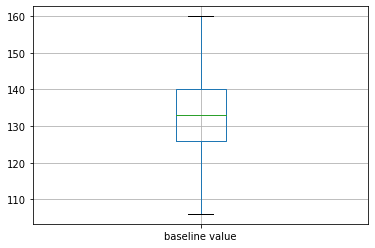

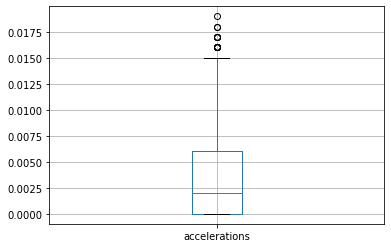

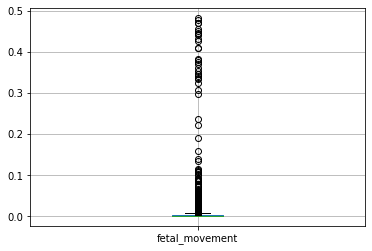

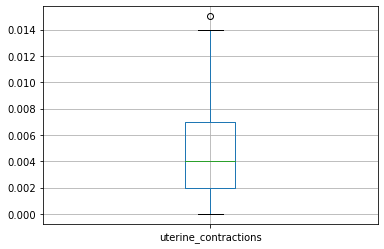

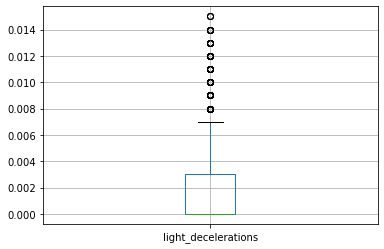

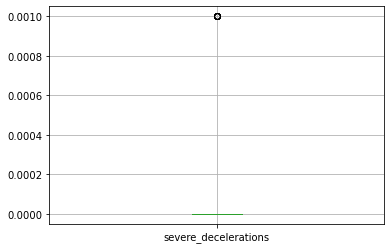

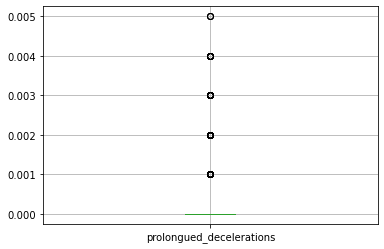

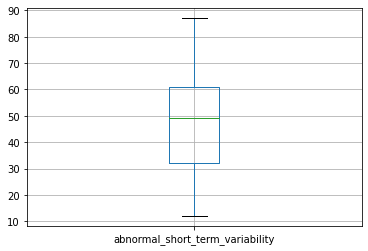

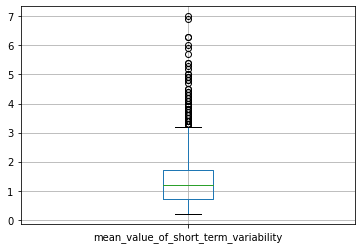

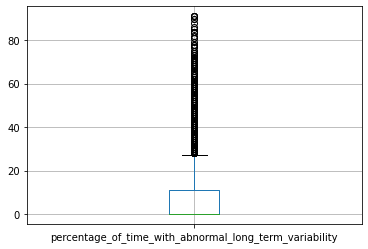

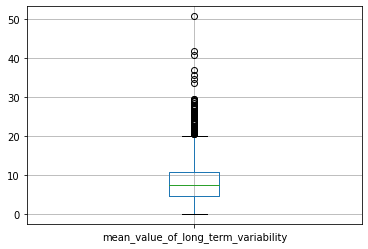

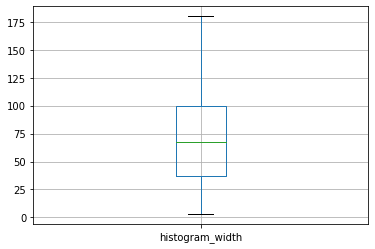

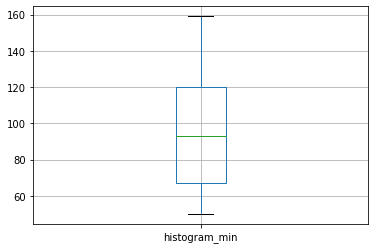

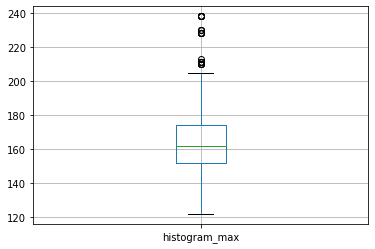

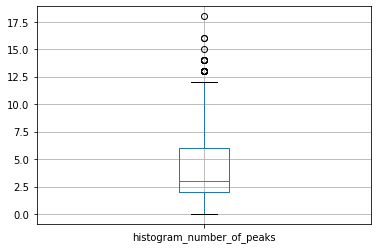

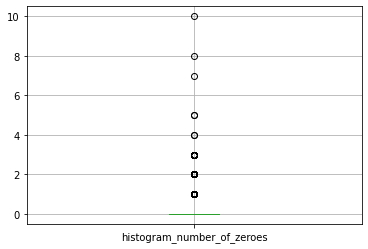

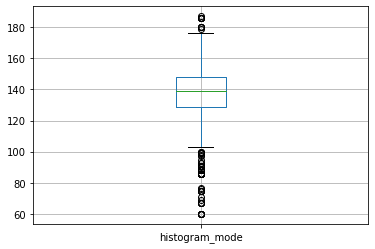

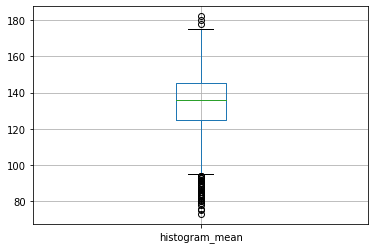

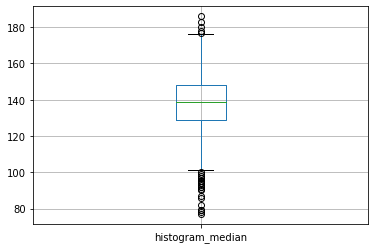

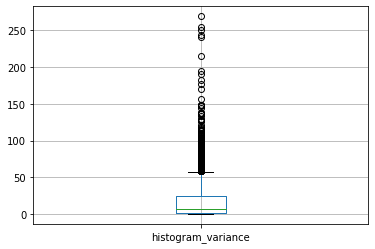

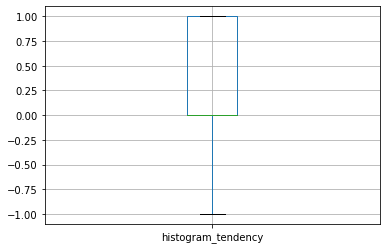

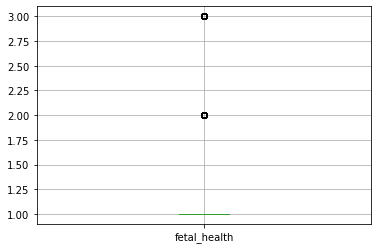

In [16]:
# Checking for Outliers via visualization:
for col in df.columns:
    if df[col].dtype in ["int64","float64"]:
        plt.figure()
        df.boxplot([col])
        plt.show()

### Outliers are Present in the dataset

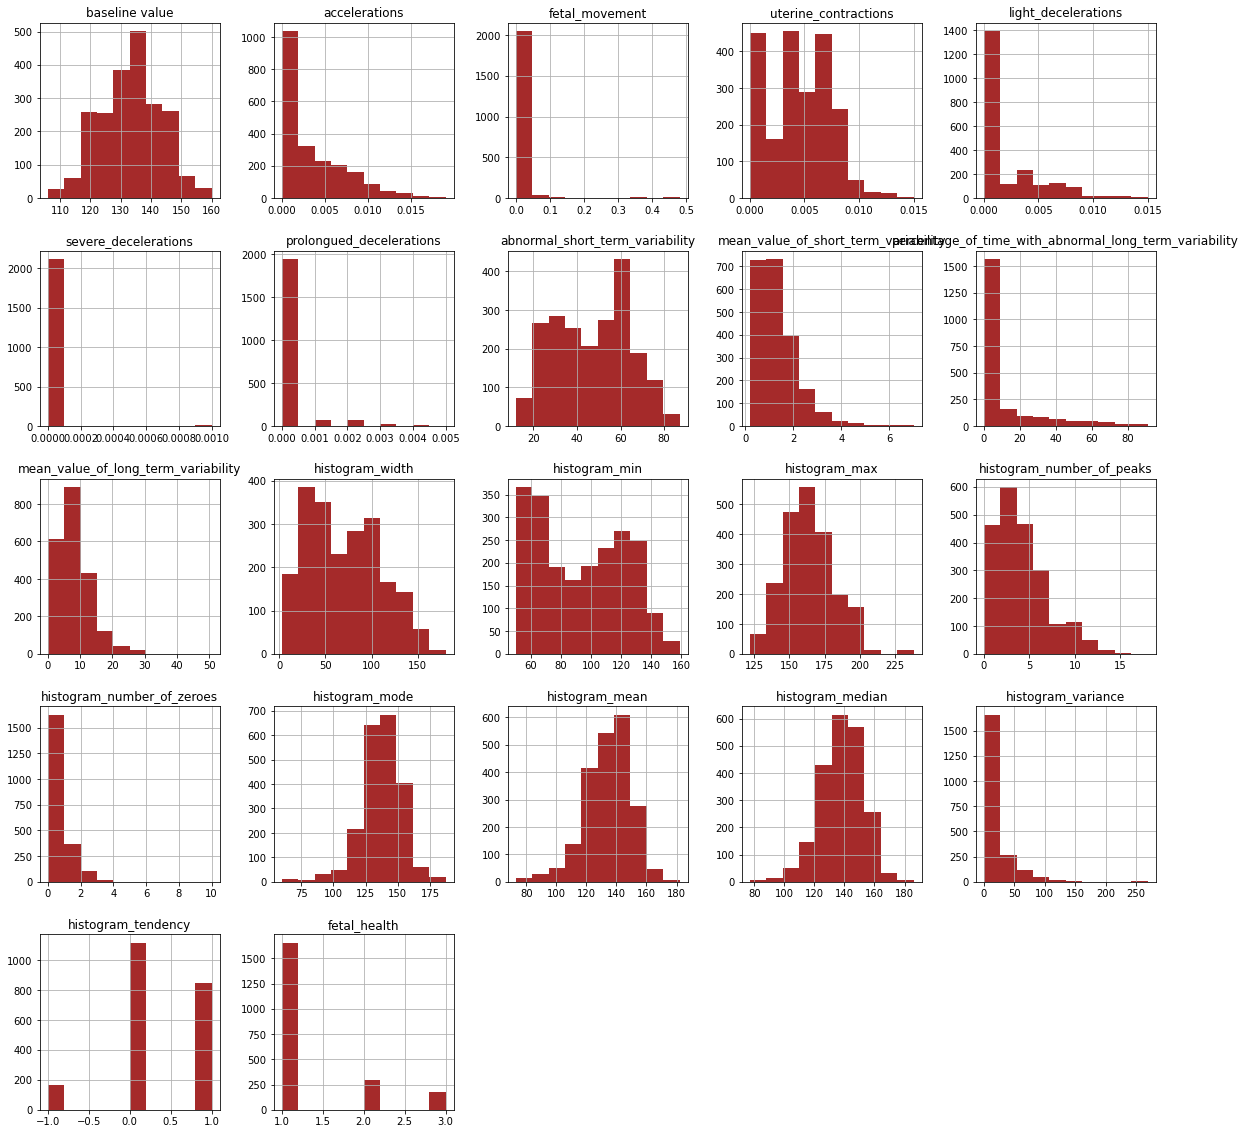

In [17]:
# Visualization of features to check the spread of data:
fig = df.hist(figsize = (20,20),color="brown")

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text

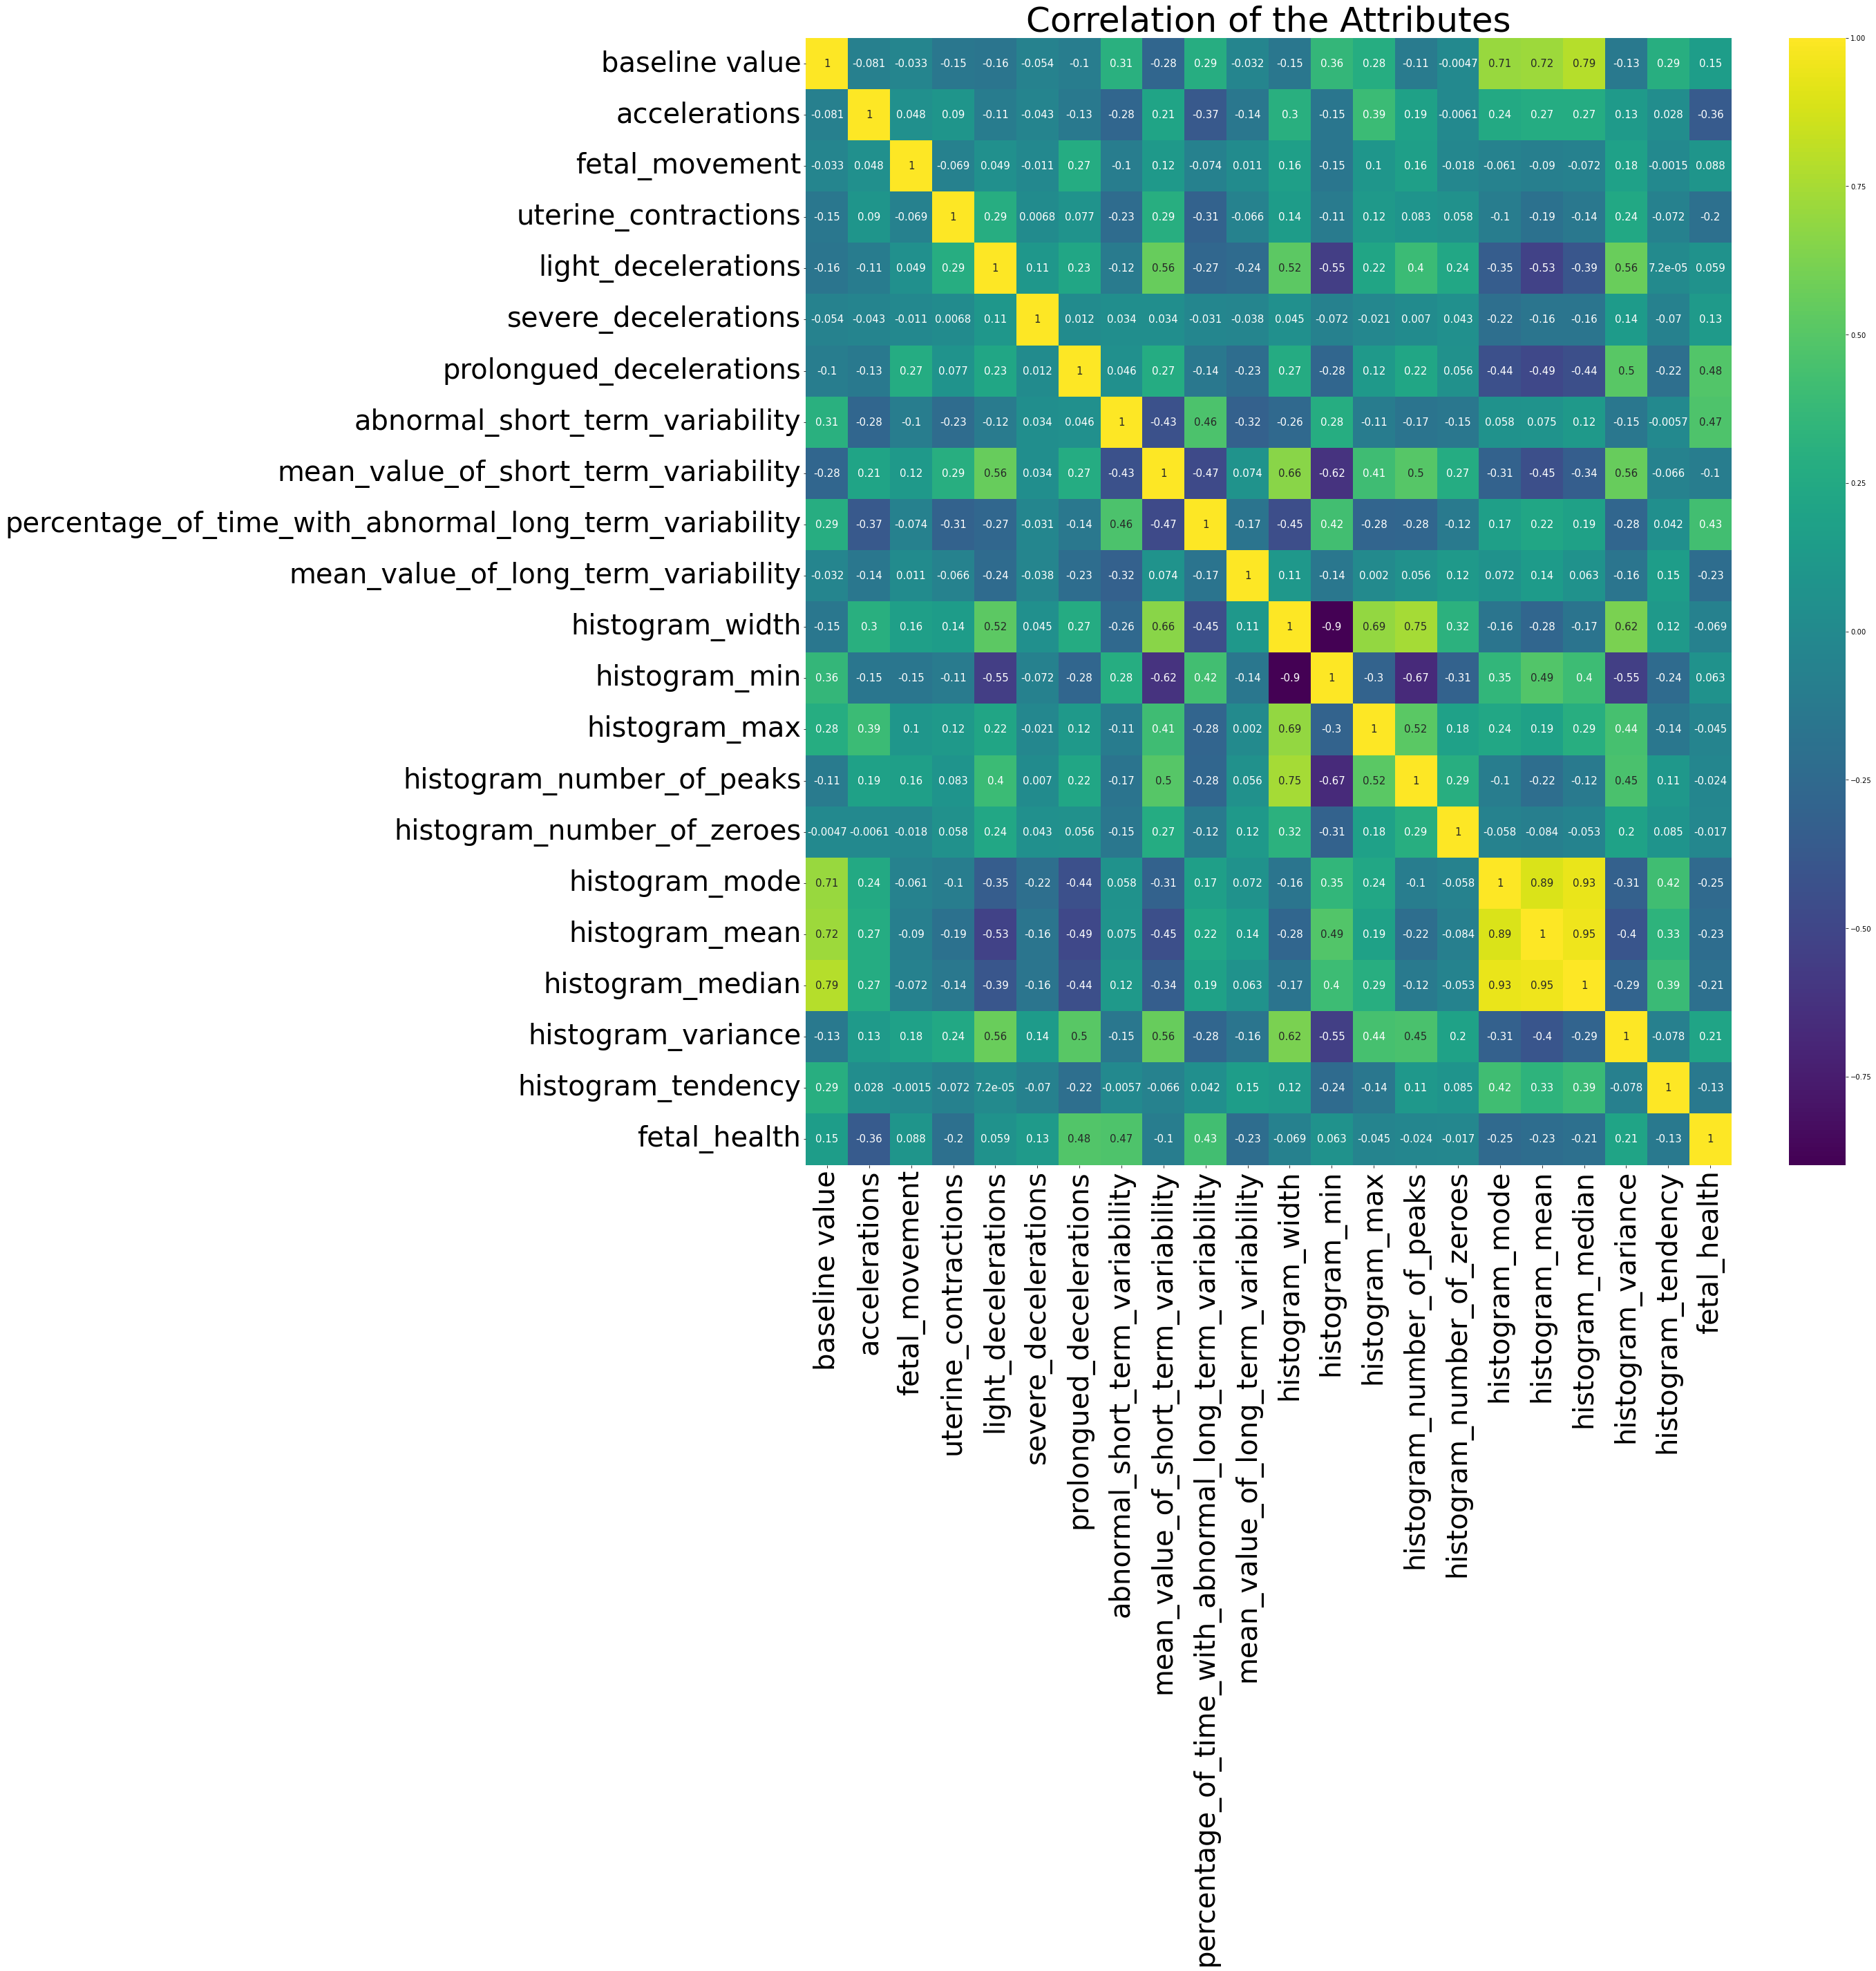

In [18]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

### The dataframe has a unique form of correlation.

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


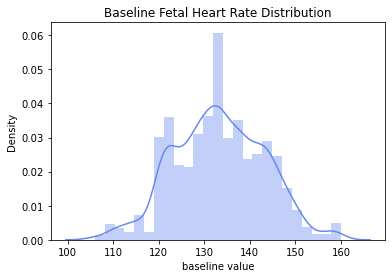

In [19]:
# Visualization of Baseline Fetal Heart Rate Distribution
sns.set_palette(palette="coolwarm")
sns.distplot(df['baseline value'])
plt.title('Baseline Fetal Heart Rate Distribution');

In [20]:
# Checking for Unique Values in the dataset
for col in df.columns:
    print(col,'=',df[col].nunique())

baseline value = 48
accelerations = 20
fetal_movement = 102
uterine_contractions = 16
light_decelerations = 16
severe_decelerations = 2
prolongued_decelerations = 6
abnormal_short_term_variability = 75
mean_value_of_short_term_variability = 57
percentage_of_time_with_abnormal_long_term_variability = 87
mean_value_of_long_term_variability = 249
histogram_width = 154
histogram_min = 109
histogram_max = 86
histogram_number_of_peaks = 18
histogram_number_of_zeroes = 9
histogram_mode = 88
histogram_mean = 103
histogram_median = 95
histogram_variance = 133
histogram_tendency = 3
fetal_health = 3


In [21]:
# Printing the columns of the dataframe
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [22]:
# Printing the unique values of fetal_health column
df['fetal_health'].unique()

array([2., 1., 3.])

In [23]:
# engineering new categorical target column for Normal and At Risk fetal health
df['fetal_health'].replace([1.000, 2.000, 3.000],[0, 1, 2],inplace=True)

### 4. Data Balancing & Spliting:

In [26]:
# Seperating Independent and Dependent Variables
x=df.drop(labels=['fetal_health'],axis=1)
y=df[['fetal_health']]

<AxesSubplot:xlabel='fetal_health'>

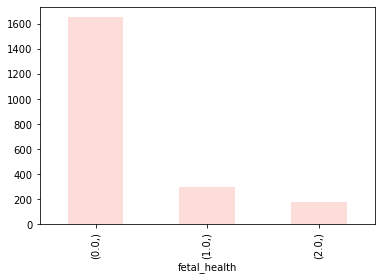

In [27]:
# Checking for balance distribution of the dataframe
y.value_counts().plot.bar()

In [28]:
# Creating a data balancing module
sme = SMOTEENN()

In [29]:
# Balancing the dataset
X, Y = sme.fit_resample(x,y)

<AxesSubplot:xlabel='fetal_health'>

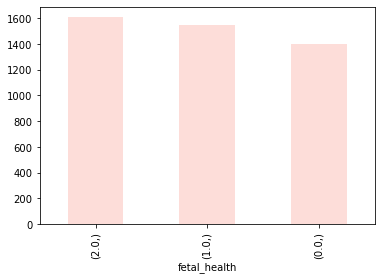

In [30]:
# Checking for balance distribution of the dataframe
Y.value_counts().plot.bar()

In [31]:
# Without Scaling
# Seperating Training and Testing Data for Model Building
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.2)

In [32]:
# With Standard Scaling
ss = StandardScaler()
X_ss=ss.fit_transform(X)
xss_train,xss_test,yss_train,yss_test=train_test_split(X_ss, Y, test_size=0.2)

In [33]:
# With Min Max Scaling
mms = MinMaxScaler()
X_mms=mms.fit_transform(X)
xmms_train,xmms_test,ymms_train,ymms_test=train_test_split(X_mms, Y, test_size=0.2)

In [34]:
# With Robust Scaling
rs = RobustScaler()
X_rs=rs.fit_transform(X)
xrs_train,xrs_test,yrs_train,yrs_test=train_test_split(X_rs, Y, test_size=0.2)

## 5. Data Visualization

In [50]:
# Replacing the values of fetal health column for easier access
Y['fetal_health'].replace([0, 1, 2],['Normal', 'Suspicion', 'At Risk'],inplace=True)

In [51]:
# creating a balanced dataframe DF
DF=X

In [52]:
# Adding the fetal health column to the dataframe
DF['Fetal Health']=Y['fetal_health']

In [53]:
# Checking the dataframe
DF

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,Fetal Health
0,132.000000,0.006000,0.000000,0.006000,0.003000,0.0,0.000000,17.000000,2.100000,0.000000,...,68.000000,198.000000,6.000000,1.000000,141.000000,136.000000,140.000000,12.000000,0.000000,Normal
1,133.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.100000,0.000000,...,68.000000,198.000000,5.000000,1.000000,141.000000,135.000000,138.000000,13.000000,0.000000,Normal
2,134.000000,0.003000,0.000000,0.008000,0.003000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,11.000000,0.000000,137.000000,134.000000,137.000000,13.000000,1.000000,Normal
3,132.000000,0.007000,0.000000,0.008000,0.000000,0.0,0.000000,16.000000,2.400000,0.000000,...,53.000000,170.000000,9.000000,0.000000,137.000000,136.000000,138.000000,11.000000,1.000000,Normal
4,131.000000,0.005000,0.072000,0.008000,0.003000,0.0,0.000000,28.000000,1.400000,0.000000,...,88.000000,154.000000,5.000000,0.000000,135.000000,134.000000,137.000000,7.000000,1.000000,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4560,134.237601,0.000537,0.199257,0.005775,0.006700,0.0,0.002000,41.950404,2.277509,0.000000,...,54.462514,163.149942,10.299885,0.462514,131.775087,109.687428,125.224913,111.325260,1.000000,At Risk
4561,132.177643,0.001274,0.000000,0.010548,0.006467,0.0,0.001452,61.000000,2.508117,0.000000,...,51.451762,182.081166,5.000000,0.000000,123.903524,96.548238,111.370595,100.532928,0.000000,At Risk
4562,148.000000,0.000000,0.001574,0.000000,0.000000,0.0,0.000000,68.629684,0.289505,75.314842,...,129.154420,153.000000,2.685158,0.000000,149.790105,148.895053,150.790105,0.000000,0.895053,At Risk
4563,123.664488,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,83.309367,0.200000,75.697170,...,118.000000,128.335512,0.335512,0.000000,123.664488,122.664488,124.664488,0.000000,0.000000,At Risk


C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Health Outcomes')

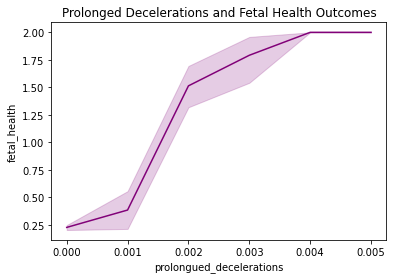

In [61]:
# Visualization of Prolonged Decelerations Vs Fetal Health Outcomes
sns.set_palette(palette="RdPu_r")
sns.lineplot('prolongued_decelerations','fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Health Outcomes')

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Prolonged Decelerations and Fetal Heart Rate')

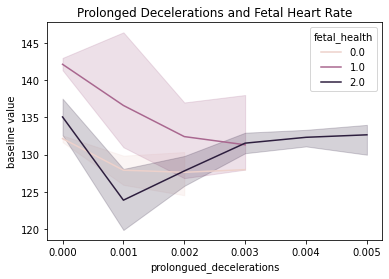

In [60]:
# Visualization of Prolonged Decelerations Vs Fetal Heart Rate
sns.set_palette(palette="RdPu")
sns.lineplot('prolongued_decelerations','baseline value',hue='fetal_health', data=df, alpha=1.0)
plt.title('Prolonged Decelerations and Fetal Heart Rate')

Text(11.538194444444443, 0.5, 'Count')

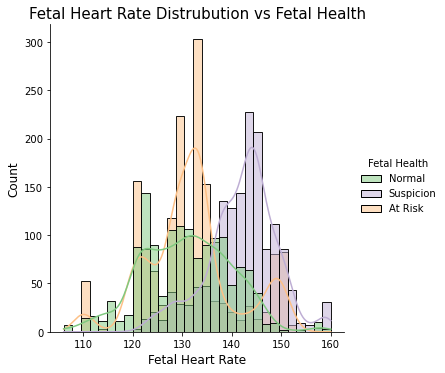

In [54]:
# Checking the relationship between Fetal Heart Rate Distrubution & Fetal Health
sns.set_palette(palette='Accent')
sns.displot(data=DF, x='baseline value', hue='Fetal Health',hue_order=('Normal','Suspicion','At Risk'), kde=True)
plt.title('Fetal Heart Rate Distrubution vs Fetal Health',fontsize=15)
plt.xlabel("Fetal Heart Rate",fontsize=12)
plt.ylabel('Count',fontsize=12)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5]),
 [Text(0, 0.5, 'baseline value'),
  Text(0, 1.5, 'accelerations'),
  Text(0, 2.5, 'fetal_movement'),
  Text(0, 3.5, 'uterine_contractions'),
  Text(0, 4.5, 'light_decelerations'),
  Text(0, 5.5, 'severe_decelerations'),
  Text(0, 6.5, 'prolongued_decelerations'),
  Text(0, 7.5, 'abnormal_short_term_variability'),
  Text(0, 8.5, 'mean_value_of_short_term_variability'),
  Text(0, 9.5, 'percentage_of_time_with_abnormal_long_term_variability'),
  Text(0, 10.5, 'mean_value_of_long_term_variability'),
  Text(0, 11.5, 'histogram_width'),
  Text(0, 12.5, 'histogram_min'),
  Text(0, 13.5, 'histogram_max'),
  Text(0, 14.5, 'histogram_number_of_peaks'),
  Text(0, 15.5, 'histogram_number_of_zeroes'),
  Text(0, 16.5, 'histogram_mode'),
  Text(0, 17.5, 'histogram_mean'),
  Text(0, 18.5, 'histogram_median'),
  Text(0, 19.5, 'histogram_variance'),
  Text(0, 20

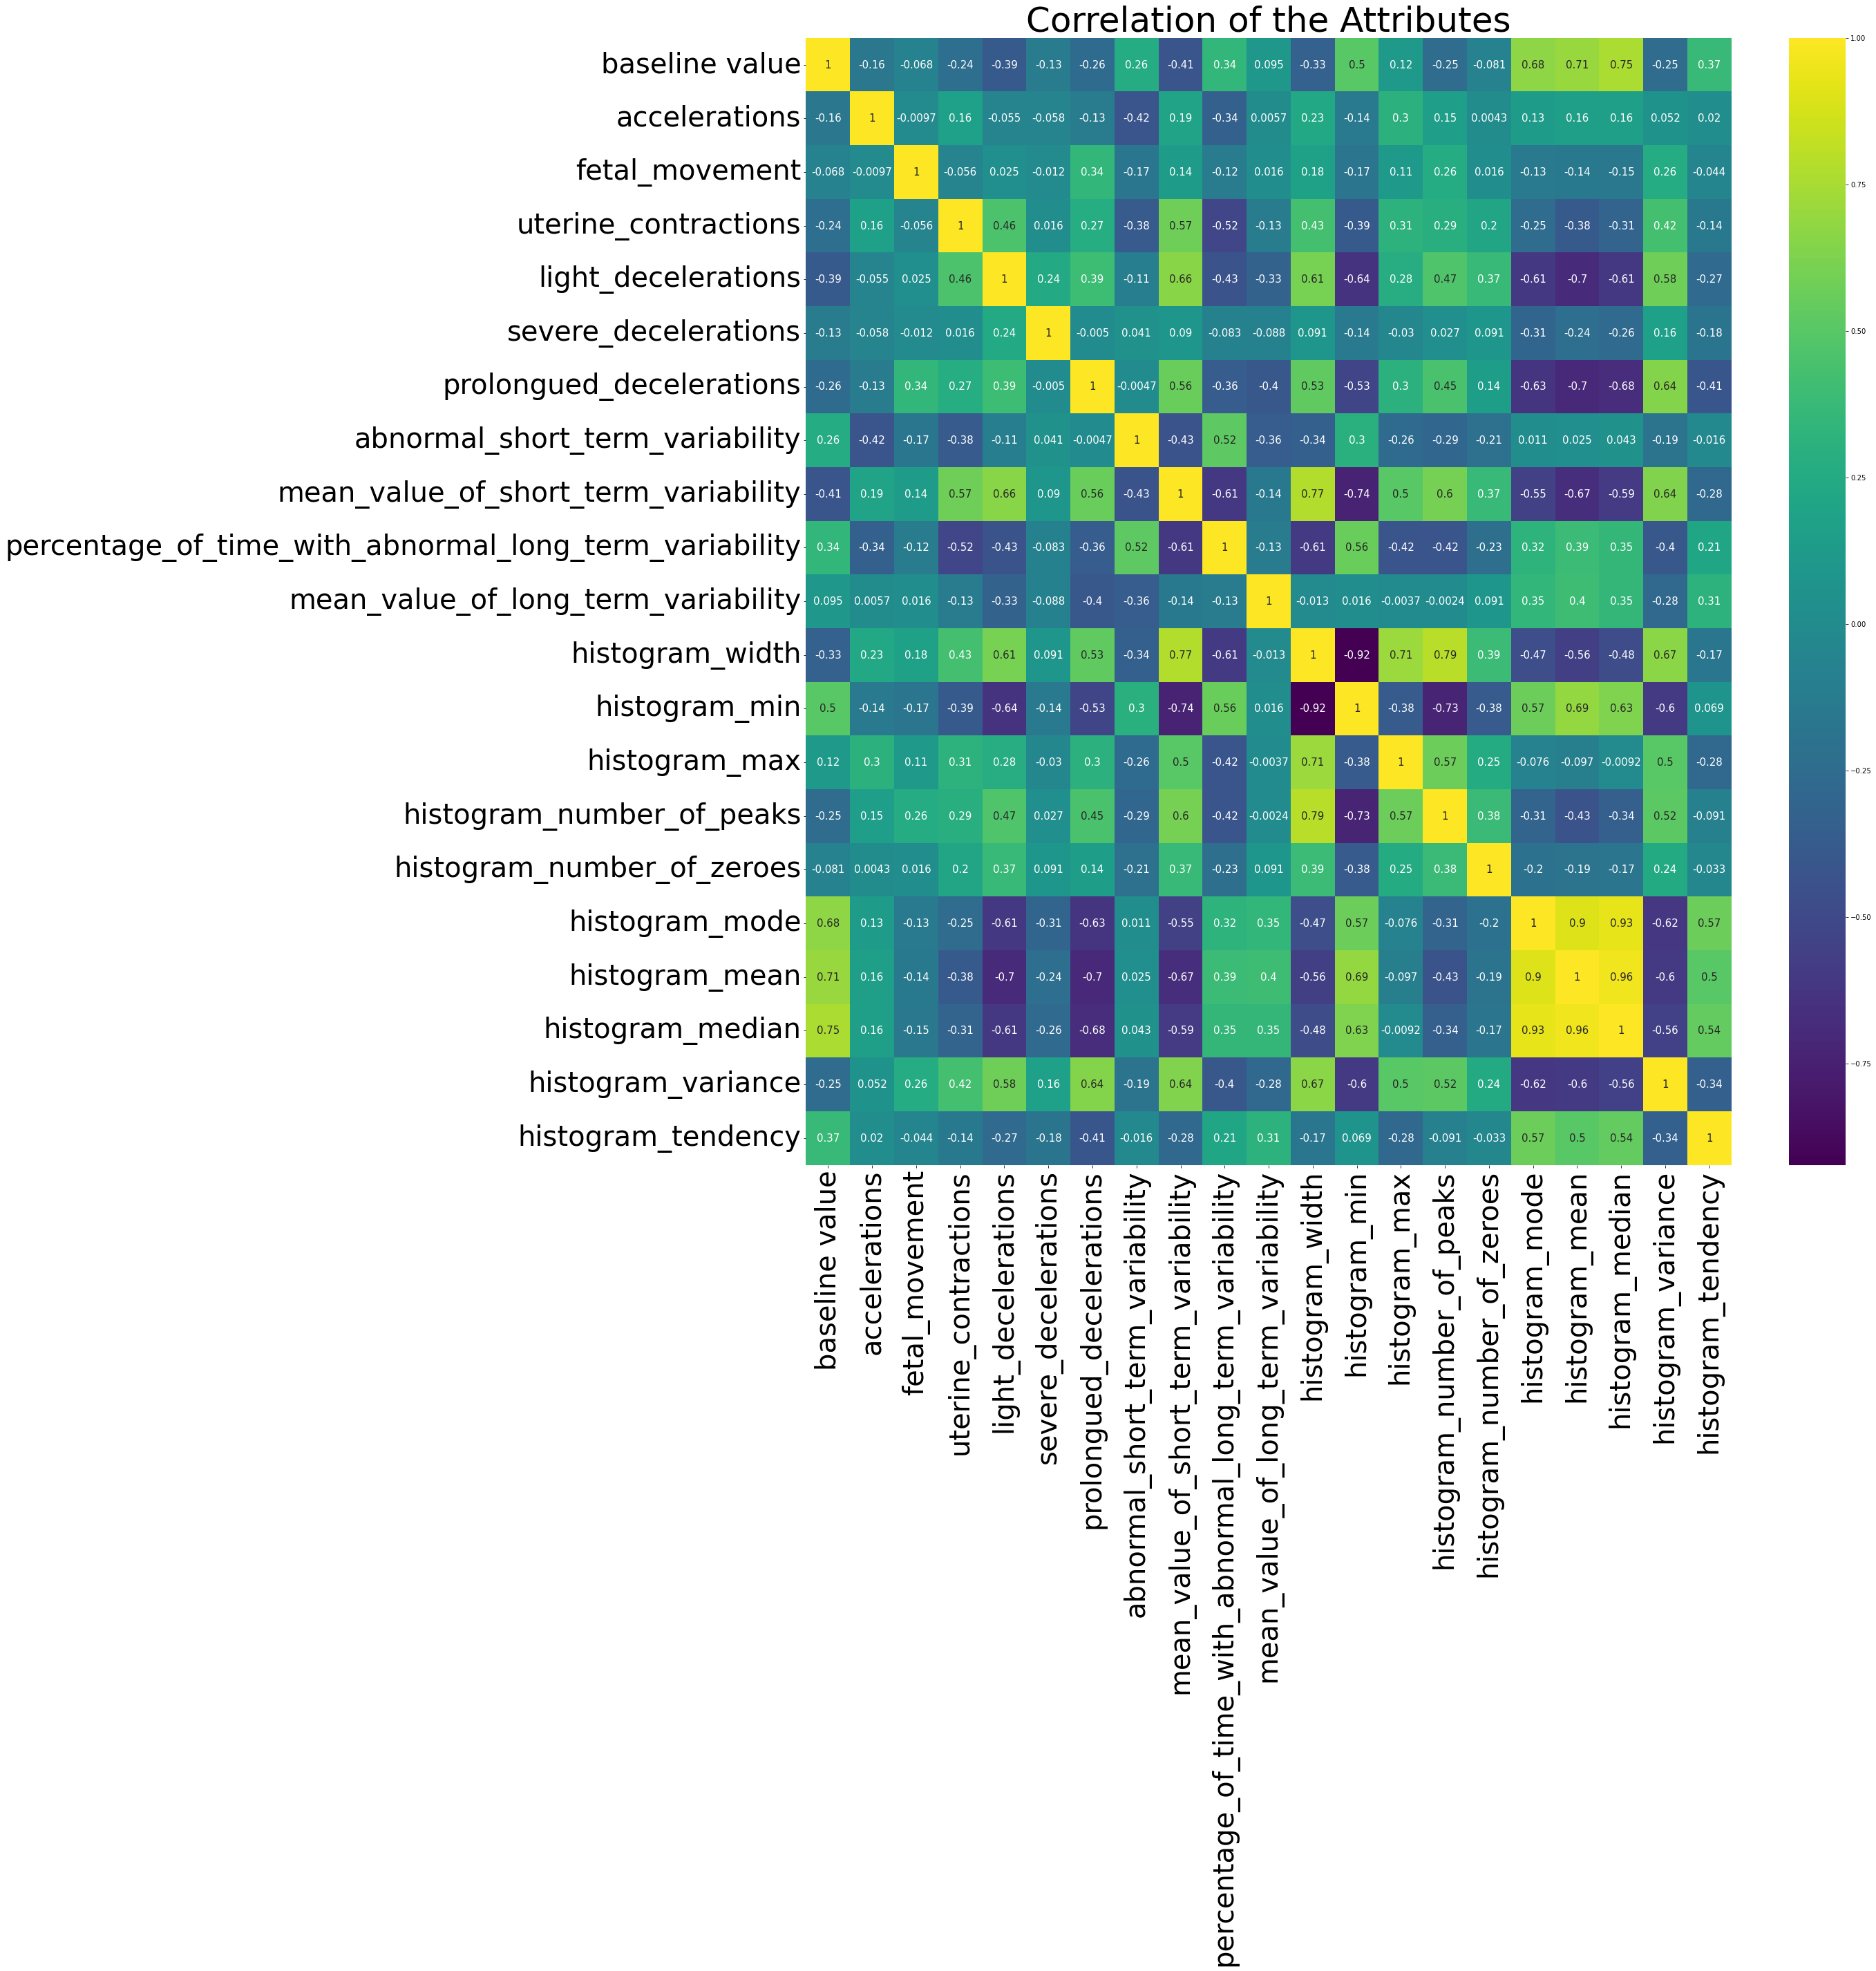

In [55]:
# Visualization of data correlation using heatmap
plt.figure(figsize=(30,30))
sns.heatmap(DF.corr(), annot=True, annot_kws={'size': 15},cmap="viridis")
plt.title('Correlation of the Attributes',fontsize=50)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)

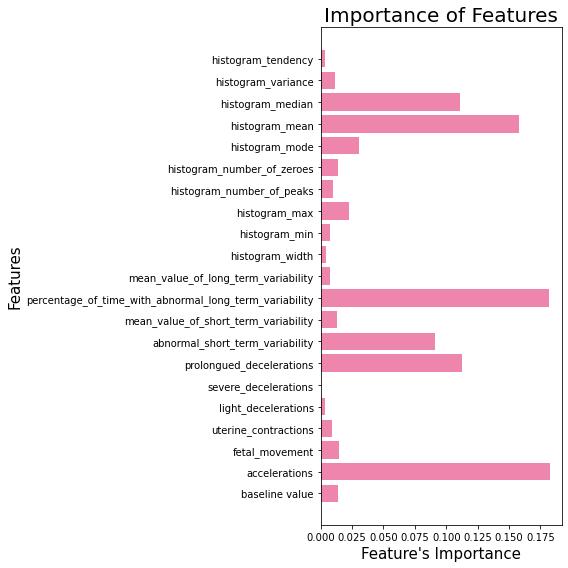

In [56]:
# Plotting Feature's Importance
def plot_feature_importances(model):
    n_features = x_train.shape[1]
    plt.figure(figsize=(8,8))
    sns.set_palette(palette="RdPu_d")
    plt.title('Importance of Features',fontsize=20)
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), x_train.columns.values) 
    plt.xlabel("Feature's Importance",fontsize=15)
    plt.ylabel('Features',fontsize=15)

plot_feature_importances(xgb)
plt.tight_layout()
plt.savefig('Feature.png')

C:\Users\roshs\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


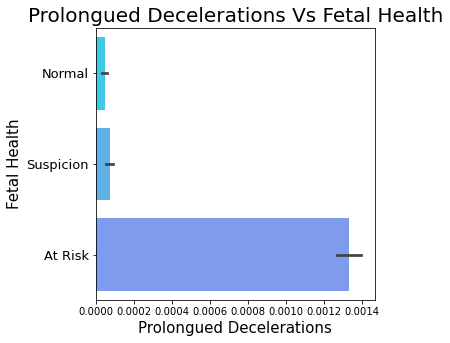

In [62]:
# Checking the relatinship between Prolongued Decelerations & Fetal Health
sns.set_palette(palette='cool')
sns.barplot('prolongued_decelerations','Fetal Health', data=DF)
y = [0,1,2]
labels = ['Normal', 'Suspicion','At Risk']
plt.yticks(y, labels,fontsize=13)
plt.title('Prolongued Decelerations Vs Fetal Health',fontsize=20)
plt.gcf().set_size_inches(5,5)
plt.ylabel('Fetal Health',fontsize=15)
plt.xlabel('Prolongued Decelerations',fontsize=15)
plt.show()

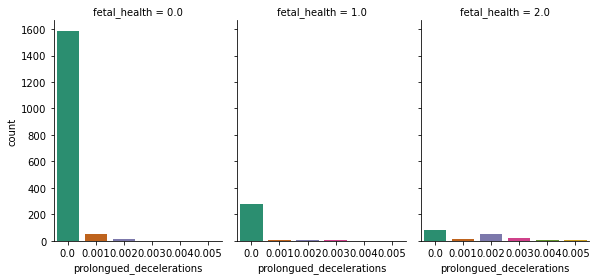

In [63]:
# Checking the relatinship between Prolongued Decelerations & each Class of Fetal Health
sns.set_palette(palette='Dark2')
sns.catplot(x="prolongued_decelerations", col="fetal_health",
                data=df, kind="count",
                height=4, aspect=0.7)

Text(0.5, 1.0, 'Mean Value of Short-Term and Long-Term Variability in FHR')

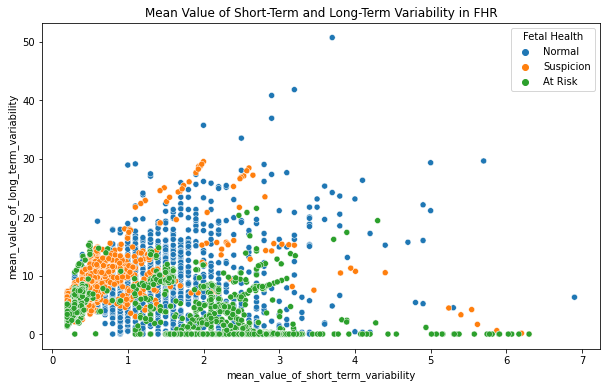

In [64]:
# Creating a scatter plot for sample from each class
sns.set_palette(palette="tab10")
plt.figure(figsize=(10,6))
sns.scatterplot(x="mean_value_of_short_term_variability", y="mean_value_of_long_term_variability", hue='Fetal Health', hue_order=('Normal','Suspicion','At Risk'), data=DF)
plt.title('Mean Value of Short-Term and Long-Term Variability in FHR')

In [65]:
# Replacing the values of fetal health column for Modelling
Y['fetal_health'].replace(['Normal', 'Suspicion', 'At Risk'], [0, 1, 2],inplace=True)

In [66]:
Y

,fetal_health
0,0
1,0
2,0
3,0
4,0
...,...
4560,2
4561,2
4562,2
4563,2


## 6. Model Building

In [37]:
# Logistic Regression Model Build
lr = LogisticRegression()
# Decision Tree model build 
dt = DecisionTreeClassifier(max_depth=5)
# Random Forest Model Build
rf = RandomForestClassifier(n_estimators = 100)
# Gaussian Naive Bayes Model
gnb = GaussianNB()
# XGBoost Classifier Model Build
xgb = XGBClassifier(n_estimators = 100)
# Support Vector Classifier Model Build
svc = SVC(kernel ='linear', C = 3)
# K-Nearest Neighbours Model Build
knn = KNeighborsClassifier(n_neighbors=15)
# Stochastic Gradient Descent Model Build
sgd = SGDClassifier(loss='hinge',shuffle=True)
# Ada Boost Classifier Model Build
abc = AdaBoostClassifier(n_estimators=100)
# Ridge Classifier Model Build
rc = RidgeClassifier()

In [38]:
# Multi-layer Perceptron Classification System Model Build
mlp = MLPClassifier(solver='lbfgs', hidden_layer_sizes=50, max_iter=150, shuffle=True)
# Quadratic Discriminant Analysis Model Build
qda = QuadraticDiscriminantAnalysis()
# Classifier Chain Model Build
cc = ClassifierChain(xgb, order='random')
# Bagging Classifier Model Build
bc = BaggingClassifier(base_estimator=rf, n_estimators=10)
# MultiOutput Classifier Model Build
moc = MultiOutputClassifier(dt)
# Bernoulli Naive Bayes classifier Model Build
bnb = BernoulliNB()
# Gaussian Mixture Model Build
gm = GaussianMixture(n_components=2)
# Linear Discriminant Analysis Model Build
lda = LinearDiscriminantAnalysis()
# Label Spreading Model Build
ls = LabelSpreading()
# Perceptron Model Build
p = Perceptron()

In [39]:
model_list=[lr, dt, rf, gnb, xgb, svc, knn, sgd, abc, rc, mlp, qda, cc, bc, moc, bnb, gm, lda, ls, p]

In [40]:
def get_score(model_list):
    for i in model_list:
        print(i)
        
        print('Without Scaling')
        i.fit(x_train,y_train)
        tr=i.score(x_train,y_train)
        print('Train Score:',tr)
        te=i.score(x_test,y_test)
        print('Test Score: ',te)
        
        print('With Standard Scaling')
        i.fit(xss_train,yss_train)
        trss=i.score(xss_train,yss_train)
        print('Train Score:',trss)
        tess=i.score(xss_test,yss_test)
        print('Test Score: ',tess)
        
        print('With Min Max Scaling')
        i.fit(xmms_train,ymms_train)
        trmms=i.score(xmms_train,ymms_train)
        print('Train Score:',trmms)
        temms=i.score(xmms_test,ymms_test)
        print('Test Score: ',temms)
        
        print('With Robust Scaling')
        i.fit(x_train,y_train)
        trrs=i.score(xrs_train,yrs_train)
        print('Train Score:',trrs)
        ters=i.score(xrs_test,yrs_test)
        print('Test Score: ',ters)

In [41]:
get_score(model_list)

LogisticRegression()
Without Scaling
Train Score: 0.8354326396495071
Test Score:  0.8587075575027382
With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Train Score: 0.9170317634173056
Test Score:  0.8981380065717415
With Min Max Scaling
Train Score: 0.9140197152245345
Test Score:  0.8948521358159912
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regr

Train Score: 0.5815991237677984
Test Score:  0.5815991237677984
DecisionTreeClassifier(max_depth=5)
Without Scaling
Train Score: 0.9553669222343921
Test Score:  0.9474260679079957
With Standard Scaling
Train Score: 0.9482475355969332
Test Score:  0.9518072289156626
With Min Max Scaling
Train Score: 0.9444140197152245
Test Score:  0.9233296823658269
With Robust Scaling
Train Score: 0.3414567360350493
Test Score:  0.33406352683461116
RandomForestClassifier()
Without Scaling
Train Score: 1.0
Test Score:  0.9978094194961665
With Standard Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_3624/3563432553.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(xss_train,yss_train)


Train Score: 1.0
Test Score:  0.9879518072289156
With Min Max Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_3624/3563432553.py:20: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(xmms_train,ymms_train)


Train Score: 1.0
Test Score:  0.9879518072289156
With Robust Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_3624/3563432553.py:27: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  i.fit(x_train,y_train)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vect

Train Score: 0.4950711938663746
Test Score:  0.5049288061336255
GaussianNB()
Without Scaling
Train Score: 0.8124315443592552
Test Score:  0.8159912376779846
With Standard Scaling
Train Score: 0.8209200438116101
Test Score:  0.7929901423877328
With Min Max Scaling
Train Score: 0.8187294633077765
Test Score:  0.7886089813800657
With Robust Scaling
Train Score: 0.5358707557502739
Test Score:  0.5443592552026287
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, gamma=None,
              gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_e

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.895947426067908
Test Score:  0.9090909090909091
With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9329134720700986
Test Score:  0.9167579408543264
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9233296823658269
Test Score:  0.904709748083242
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score: 0.32749178532311063
Test Score:  0.35815991237677985
KNeighborsClassifier(n_neighbors=15)
Without Scaling
Train Score: 0.9622124863088719
Test Score:  0.9616648411829135
With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score: 0.9633077765607886
Test Score:  0.9539978094194962
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Train Score: 0.9679627601314348
Test Score:  0.9561883899233297
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Train Score: 0.3565169769989047
Test Score:  0.3384446878422782
SGDClassifier()
Without Scaling
Train Score: 0.6429353778751369


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Score:  0.6681270536692223
With Standard Scaling
Train Score: 0.9126506024096386
Test Score:  0.9014238773274917
With Min Max Scaling
Train Score: 0.9019715224534501
Test Score:  0.8904709748083242
With Robust Scaling
Train Score: 0.5528477546549836
Test Score:  0.5640744797371303
AdaBoostClassifier(n_estimators=100)
Without Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\l

Train Score: 0.9307228915662651
Test Score:  0.9211391018619934
With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9184008762322016
Test Score:  0.9079956188389924
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9156626506024096
Test Score:  0.9079956188389924
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but AdaBoostClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1059: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:1059: DataConversionWarn

Train Score: 0.38608981380065716
Test Score:  0.3669222343921139
RidgeClassifier()
Without Scaling
Train Score: 0.8633625410733844
Test Score:  0.8455640744797371
With Standard Scaling
Train Score: 0.8997809419496167
Test Score:  0.9003285870755751
With Min Max Scaling
Train Score: 0.9019715224534501
Test Score:  0.8784227820372399
With Robust Scaling
Train Score: 0.34008762322015335
Test Score:  0.3658269441401972
MLPClassifier(hidden_layer_sizes=50, max_iter=150, solver='lbfgs')
Without Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.8745892661555312
Test Score:  0.8871851040525739
With Standard Scaling
Train Score: 1.0
Test Score:  0.9857612267250822
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9748083242059146
Test Score:  0.9693318729463308
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel()

Train Score: 0.23411829134720702
Test Score:  0.2420591456736035
QuadraticDiscriminantAnalysis()
Without Scaling
Train Score: 0.7149507119386638
Test Score:  0.7075575027382256
With Standard Scaling
Train Score: 0.8291347207009858
Test Score:  0.80065717415115
With Min Max Scaling
Train Score: 0.6856516976998904
Test Score:  0.6714129244249726
With Robust Scaling
Train Score: 0.3565169769989047
Test Score:  0.3384446878422782
ClassifierChain(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=0,
                  

C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ClassifierChain was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but ClassifierChain was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.302026286966046
Test Score:  0.32749178532311063
BaggingClassifier(base_estimator=RandomForestClassifier())
Without Scaling
Train Score: 0.9994523548740416
Test Score:  0.9945235487404163
With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9997261774370209
Test Score:  0.9890470974808324
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9994523548740416
Test Score:  0.9868565169769989
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Train Score: 0.47508214676889376
Test Score:  0.4950711938663746
MultiOutputClassifier(estimator=DecisionTreeClassifier(max_depth=5))
Without Scaling
Train Score: 0.9553669222343921
Test Score:  0.9485213581599123
With Standard Scaling
Train Score: 0.9482475355969332


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


Test Score:  0.9518072289156626
With Min Max Scaling
Train Score: 0.9444140197152245
Test Score:  0.9233296823658269
With Robust Scaling
Train Score: 0.3414567360350493
Test Score:  0.33406352683461116
BernoulliNB()
Without Scaling
Train Score: 0.7420591456736035
Test Score:  0.7590361445783133
With Standard Scaling
Train Score: 0.7858707557502739
Test Score:  0.7721796276013143
With Min Max Scaling
Train Score: 0.7532858707557503
Test Score:  0.7305585980284776
With Robust Scaling
Train Score: 0.7248083242059146
Test Score:  0.7086527929901424
GaussianMixture(n_components=2)
Without Scaling
Train Score: -1.738017130254271
Test Score:  -2.344067282319278
With Standard Scaling
Train Score: 2.342284612898075
Test Score:  2.3501365331610784
With Min Max Scaling
Train Score: 34.964557285663034


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarn

Test Score:  34.62693714026979
With Robust Scaling
Train Score: -592567.9124799875
Test Score:  -641312.3059844136
LinearDiscriminantAnalysis()
Without Scaling
Train Score: 0.8926615553121577
Test Score:  0.8981380065717415
With Standard Scaling
Train Score: 0.8937568455640745
Test Score:  0.8970427163198248
With Min Max Scaling
Train Score: 0.8967688937568455
Test Score:  0.882803943044907
With Robust Scaling
Train Score: 0.5481927710843374
Test Score:  0.5618838992332968
LabelSpreading()
Without Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3

Train Score: 1.0
Test Score:  0.9375684556407448
With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9994523548740416
Test Score:  0.9868565169769989
With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Train Score: 0.9660460021905805
Test Score:  0.940854326396495
With Robust Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LabelSpreading was fitted with feature names
  warnings.warn(
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in true_divide
  probabilities /= normalizer


Train Score: 0.302026286966046
Test Score:  0.32749178532311063
Perceptron()
Without Scaling
Train Score: 0.7483570646221248
Test Score:  0.7447973713033954
With Standard Scaling
Train Score: 0.8929353778751369
Test Score:  0.8762322015334063
With Min Max Scaling
Train Score: 0.8617196056955093
Test Score:  0.8619934282584885
With Robust Scaling
Train Score: 0.6366374589266156
Test Score:  0.6352683461117196


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\roshs\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

### 7. Model Evaluation:
### Best Models

1. RandomForestClassifier
* Without Scaling 0.9912280701754386
* With Min Max Scaling 0.993421052631579

2. XGBClassifier
* Without Scaling 0.9912280701754386
* With Min Max Scaling 0.9967105263157895

3. ClassifierChain
* Without Scaling 0.9912280701754386
* With Min Max Scaling 0.9967105263157895

4. BaggingClassifier
* Without Scaling 0.993421052631579
* With Standard Scaling 0.9912280701754386
* With Min Max Scaling 0.9945175438596491


In [42]:
def without_s_score(m):
    
    print(m, 'Without Scaling')
    
    m.fit(x_train,y_train)
    
    y_score = m.predict_proba(x_test)
    y_pred = m.predict(x_test)

#     plot_roc(y_test, y_score)
#     plt.show()
    
#     plot_precision_recall(y_test, y_score)
#     plt.show()
    
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    
    print(f'Classification Report:\n {metrics.classification_report(y_test, y_pred)}\n')
    
    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(y_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' ) 
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [43]:
def with_ss_score(m):
    
    print(m, 'With Standard Scaling')
    
    m.fit(xss_train,yss_train)
    
    y_score = m.predict_proba(xss_test)
    y_pred = m.predict(xss_test)

#     plot_roc(yss_test, y_score)
#     plt.show()
    
#     plot_precision_recall(yss_test, y_score)
#     plt.show()
    
    print("Accuracy: ", accuracy_score(yss_test, y_pred))
    
    print(f'Classification Report:\n {metrics.classification_report(yss_test, y_pred)}\n')
    
    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(yss_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' ) 
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [44]:
def with_mms_score(m):
    
    print(m, 'With Min Max Scaling')
    
    m.fit(xmms_train,ymms_train)
    
    y_score = m.predict_proba(xmms_test)
    y_pred = m.predict(xmms_test)

#     plot_roc(ymms_test, y_score)
#     plt.show()
    
#     plot_precision_recall(ymms_test, y_score)
#     plt.show()
    
    print("Accuracy: ", accuracy_score(ymms_test, y_pred))
    
    print(f'Classification Report:\n {metrics.classification_report(ymms_test, y_pred)}\n')
    
    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(ymms_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' ) 
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

In [45]:
def with_rs_score(m):
    
    print(m, 'With Robust Scaling')
    
    m.fit(xrs_train,yrs_train)
    
    y_score = m.predict_proba(xrs_test)
    y_pred = m.predict(xrs_test)

#     plot_roc(yrs_test, y_score)
#     plt.show()
    
#     plot_precision_recall(yrs_test, y_score)
#     plt.show()
    
    print("Accuracy: ", accuracy_score(yrs_test, y_pred))
    
    print(f'Classification Report:\n {metrics.classification_report(yrs_test, y_pred)}\n')
    
    # Printing the Confusion Matrix of XGBoost Classifier Model
    plt.figure(figsize=(6,5))
    sns.heatmap(metrics.confusion_matrix(yrs_test, y_pred),annot=True,xticklabels = ['Normal', 'Suspicion','At Risk'] , yticklabels = ['Normal', 'Suspicion','At Risk'],cmap='RdPu' ) 
    plt.ylabel('True Values',fontsize=15)
    plt.xlabel('Predicted Values',fontsize=15)
    plt.title('Accuracy of the Test',fontsize=20)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)

RandomForestClassifier() Without Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_3624/2178429604.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(x_train,y_train)


Accuracy:  0.9989047097480832
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       298
         1.0       1.00      1.00      1.00       294
         2.0       1.00      1.00      1.00       321

    accuracy                           1.00       913
   macro avg       1.00      1.00      1.00       913
weighted avg       1.00      1.00      1.00       913


RandomForestClassifier() With Min Max Scaling


C:\Users\roshs\AppData\Local\Temp/ipykernel_3624/4054655336.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  m.fit(xmms_train,ymms_train)


Accuracy:  0.9890470974808324
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       288
         1.0       0.98      0.99      0.98       301
         2.0       0.99      1.00      0.99       324

    accuracy                           0.99       913
   macro avg       0.99      0.99      0.99       913
weighted avg       0.99      0.99      0.99       913




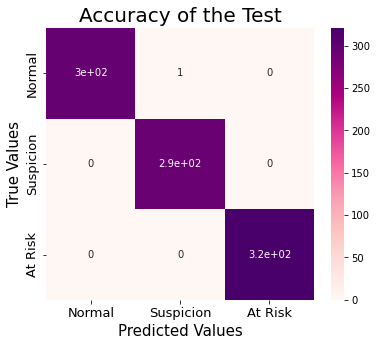

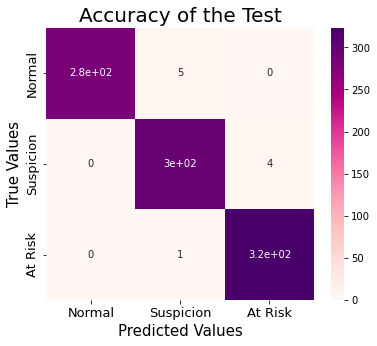

In [46]:
# Evaluating Random Forest Models
without_s_score(rf)
with_mms_score(rf)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...) Without Scaling
Accuracy:  0.9934282584884995
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       298
         1.0       0.99      0.99      0.99       294
         2.0       1.00      1.00      1.00       321


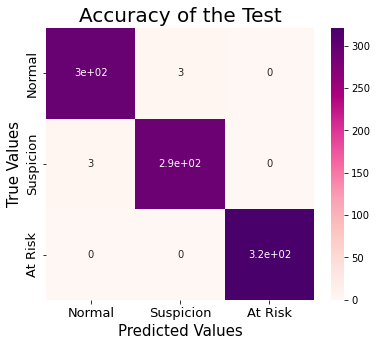

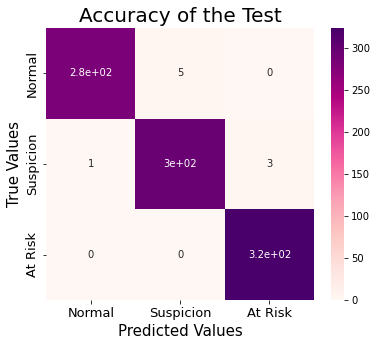

In [47]:
# XGBClassifier Models 
without_s_score(xgb)
with_mms_score(xgb)

ClassifierChain(base_estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                             callbacks=None,
                                             colsample_bylevel=1,
                                             colsample_bynode=1,
                                             colsample_bytree=1,
                                             early_stopping_rounds=None,
                                             enable_categorical=False,
                                             eval_metric=None, gamma=0,
                                             gpu_id=-1, grow_policy='depthwise',
                                             importance_type=None,
                                             interaction_constraints='',
                                             learning_rate=0.300000012,
                                             max_bin=256, max_cat_to_onehot=4,
                                             max_delta_step=0, max_depth=6,


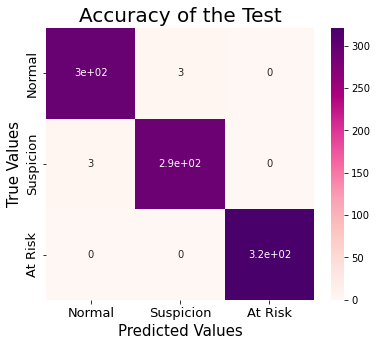

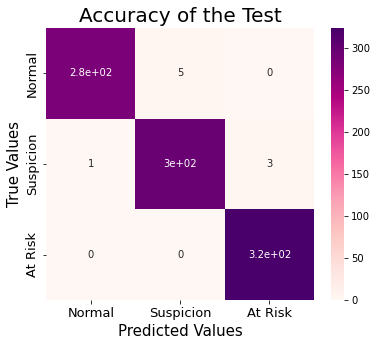

In [48]:
# Evaluating ClassifierChain Models 
without_s_score(cc)
with_mms_score(cc)

BaggingClassifier(base_estimator=RandomForestClassifier()) Without Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9945235487404163
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       298
         1.0       0.99      1.00      0.99       294
         2.0       1.00      1.00      1.00       321

    accuracy                           0.99       913
   macro avg       0.99      0.99      0.99       913
weighted avg       0.99      0.99      0.99       913


BaggingClassifier(base_estimator=RandomForestClassifier()) With Standard Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9890470974808324
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       275
         1.0       0.97      1.00      0.98       291
         2.0       1.00      0.99      1.00       347

    accuracy                           0.99       913
   macro avg       0.99      0.99      0.99       913
weighted avg       0.99      0.99      0.99       913


BaggingClassifier(base_estimator=RandomForestClassifier()) With Min Max Scaling


C:\Users\roshs\anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:719: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy:  0.9868565169769989
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       288
         1.0       0.98      0.98      0.98       301
         2.0       0.99      1.00      0.99       324

    accuracy                           0.99       913
   macro avg       0.99      0.99      0.99       913
weighted avg       0.99      0.99      0.99       913




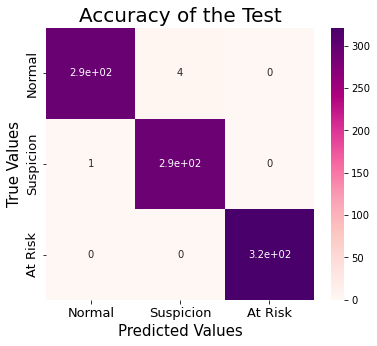

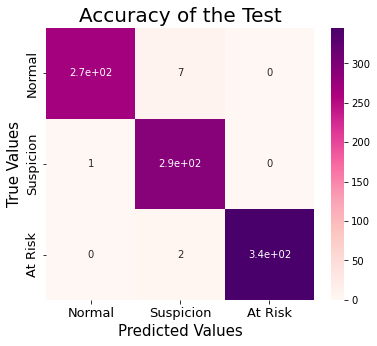

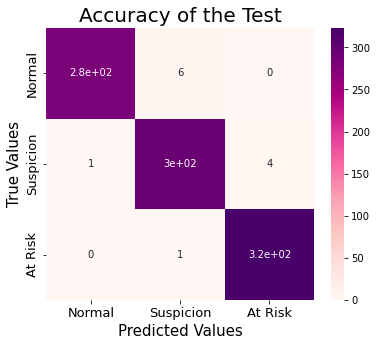

In [49]:
# Evaluating BaggingClassifier Models
without_s_score(bc)
with_ss_score(bc)
with_mms_score(bc)

## 8. Model Selection:

In [69]:
rf.fit(x_train,y_train)
y_score = rf.predict_proba(x_test)
y_pred = rf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, y_pred))

C:\Users\roshs\AppData\Local\Temp/ipykernel_3624/3418833908.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


Accuracy:  0.9978094194961665


### All the models seems to have some imperfections; lets go with Random Forest Classifier Model Without Scaling, since it showed the close to perfect score.

## 9. Saving the Selected Model:

In [70]:
# Saving the XGBoost Classifier Model
data={"Model": rf}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)

In [71]:
# Checking the saved model
with open('saved_steps.pkl','rb') as file:
    data = pickle.load(file)

model=data["Model"]

In [72]:
# Storing one entry of the testing dataset
test=x_test.iloc[9:10,:]

In [73]:
# Checking the data
test

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1690,143.917256,0.0,0.0,0.00676,0.0,0.0,0.0,59.041372,0.423966,17.479314,...,20.520686,143.437942,163.958628,0.479314,0.0,153.0,153.198285,154.198285,1.479314,0.0


In [74]:
# Storing the data for testing purposes
test.to_csv('test_csv.csv',index=0)

# V. Conclusion:
# Capstone Project Completed Successfully with Close to Perfect Score with Random Forest Classifier Model Wothout Scaling Predicting the Health condition of the Fetus.